# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Generate-adjoint-products-of-normal-random-matrices-and-vectors" data-toc-modified-id="Generate-adjoint-products-of-normal-random-matrices-and-vectors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generate adjoint products of normal random matrices and vectors</a></div><div class="lev1 toc-item"><a href="#QQ-plot-for-comparing-normality" data-toc-modified-id="QQ-plot-for-comparing-normality-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>QQ-plot for comparing normality</a></div><div class="lev1 toc-item"><a href="#Statistical-tests-for-normality" data-toc-modified-id="Statistical-tests-for-normality-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Statistical tests for normality</a></div><div class="lev2 toc-item"><a href="#scipy.stats-diagnostic-tests-for-normality" data-toc-modified-id="scipy.stats-diagnostic-tests-for-normality-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><code>scipy.stats</code> diagnostic tests for normality</a></div><div class="lev2 toc-item"><a href="#statsmodels-diagnostic-tests-for-normality" data-toc-modified-id="statsmodels-diagnostic-tests-for-normality-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><code>statsmodels</code> diagnostic tests for normality</a></div><div class="lev1 toc-item"><a href="#Expected-largest-entry?" data-toc-modified-id="Expected-largest-entry?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Expected largest entry?</a></div>

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Generate adjoint products of normal random matrices and vectors

In [7]:
def Atz(m, N, **kwargs):
    scaling = kwargs.get('scaling', 'm**-.5')
    eta = kwargs.get('eta', 1)
    if not (scaling == 1):
        scaling = 1/np.sqrt(m)
    return (scaling*np.random.randn(N, m)) @ np.random.randn(m)

Compute adjoint product and print mean, variance and histogram of result.

mean: 0.005438017080703184
var: 0.9998719676063136


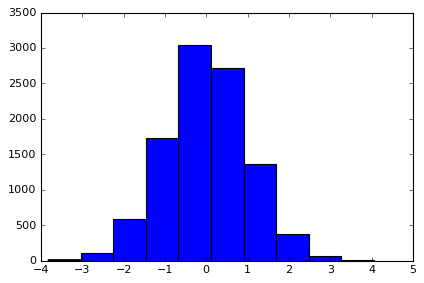

In [8]:
rho = Atz(1000, 10000)
print('mean: {}\nvar: {}'.format(rho.mean(), rho.var()))
plt.hist(rho);

Normalize the data.

In [9]:
Z = (rho - rho.mean())/rho.std()

# QQ-plot for comparing normality

The histogram looks normally distributed, so let's improve our intuition with a qq-plot (actually maybe technically called a prob-plot).

In [10]:
from statsmodels.graphics.gofplots import qqplot

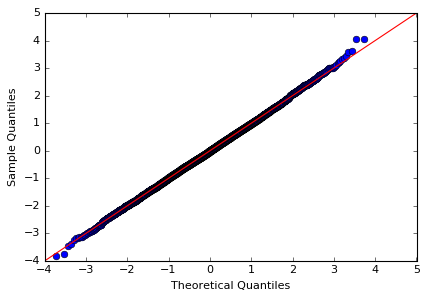

In [11]:
qqplot(Z, line='45');

# Statistical tests for normality

## `scipy.stats` diagnostic tests for normality

Kolmogorov-Smirnov test for normality.

In [12]:
from scipy.stats import kstest

In [13]:
kstest(rho, 'norm')

KstestResult(statistic=0.008084103308651891, pvalue=0.53052137094561547)

## `statsmodels` diagnostic tests for normality

The Lilliefors test for normality with unknown mean and variance is a "corrected" version of the K-S test for normality (*cf.* above). The Anderson-Darling test for normality with unknown mean and variance reportedly has greater power for distinguishing normality than the Lilliefors test.

In [16]:
from statsmodels.stats.diagnostic import normal_ad, lillifors

In [15]:
lillifors(rho)

(0.0076359344834193155, 0.19675788071812925)

In [17]:
normal_ad(rho)

(0.51350868310146325, 0.19326037306847452)

# Expected largest entry? 

Load associated file `randomNormalInfNorm.json`

In [1]:
import json

In [10]:
mvec = (100, 500, 100)
Nvec = (1000, 2000, 3000)
normalInfNorm = np.array(json.load(open('./randomNormalInfNorm.json', 'r+')))

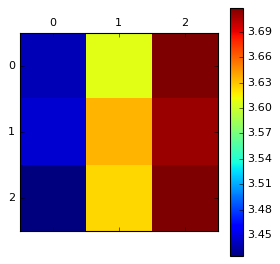

In [11]:
plt.matshow(normalInfNorm.mean(axis=2))
plt.colorbar();

In [18]:
normalInfNorm.mean(axis=2)

array([[ 3.43997915,  3.60808984,  3.71732943],
       [ 3.44664447,  3.63515939,  3.71065931],
       [ 3.42540422,  3.62486786,  3.71788486]])

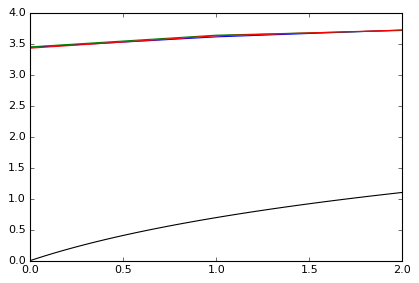

In [24]:
plt.plot(normalInfNorm.mean(axis=2).T);
plt.plot(np.linspace(0, 2, 50), np.log(1+np.linspace(0, 2, 50)), 'k')